In [1]:
import numpy as np
import os
from scipy.misc.pilutil import imread, imresize
import datetime
from skimage import io
import os
import random
import matplotlib.pyplot as plt
% matplotlib inline
import glob
import glob
import numpy as np
import cv2

UsageError: Line magic function `%` not found.


In [2]:

np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.set_random_seed(30)

Using TensorFlow backend.


In [3]:
# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image in zip(axes, images):
        ax.imshow(image, cmap)

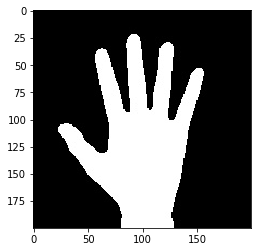

In [4]:

import cv2

cat = cv2.imread('my_dataset/data/five/hand1(984).jpg')
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))
# cv2.imshow('image', cat)

my_dataset/data/five/*
2019


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if sys.path[0] == '':


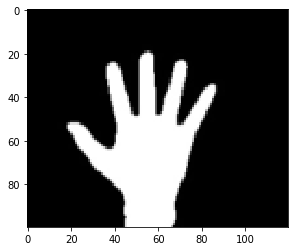

In [5]:
# path to your dataset
DATASET_PATH = 'my_dataset/data/five/'

gesture_path = os.path.join(DATASET_PATH, '*')
print(gesture_path)
import glob
gesture_path = glob.glob(gesture_path)

rand_index = random.randint(0, len(gesture_path))
print(len(gesture_path))
image = cv2.imread(gesture_path[rand_index])
image = imresize(image,[100, 120])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))



In [6]:
# path to your dataset
DATASET_PATH = 'my_dataset/data'

dataset_path = os.path.join(DATASET_PATH, '*')
import glob
dataset_path = glob.glob(dataset_path)
dataset_path


['my_dataset/data/ok',
 'my_dataset/data/thumbsup',
 'my_dataset/data/blank',
 'my_dataset/data/thumbsdown',
 'my_dataset/data/fist',
 'my_dataset/data/five']

In [7]:
loaded_images = []

list_of_gestures = ['blank', 'ok', 'thumbsup', 'thumbsdown', 'fist', 'five']

for path in range(0, len(dataset_path)):
    dataset_path = "my_dataset/data/" + str(list_of_gestures[path])
    print(dataset_path)
    gesture_path = os.path.join(dataset_path, '*')
    import glob
    gest_path = glob.glob(gesture_path)
    print(len(gest_path))
    k = 0
    for i in range(0, len(gest_path)):
        if k < 1600:
            image = cv2.imread(gest_path[i])
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            gray_image = imresize(gray_image,[100, 120])
            loaded_images.append(gray_image)
        k=k+1
    
len(loaded_images)

my_dataset/data/blank
1616


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.


my_dataset/data/ok
1675
my_dataset/data/thumbsup
1618
my_dataset/data/thumbsdown
1641
my_dataset/data/fist
1752
my_dataset/data/five
2019


9600

In [15]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam

# model
model = Sequential()

# first conv layer
# input shape = (img_rows, img_cols, 1)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,120, 1))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(6, activation='softmax'))

# model summary
optimiser = Adam() #write your optimizer
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 118, 32)       320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 98, 118, 32)       128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 59, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 59, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 57, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 47, 57, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 28, 64)       

In [9]:
outputVectors = []
for i in range(1, 1601):
    outputVectors.append([1, 0, 0, 0, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 1, 0, 0, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 1, 0, 0, 0])
    
for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 1, 0, 0])
    
for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 0, 1, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 0, 0, 1])

len(outputVectors)    

9600

In [10]:
print(len(loaded_images))
print(len(outputVectors))


9600
9600


In [11]:

X = np.asarray(loaded_images)
y = np.asarray(outputVectors)
print(X.shape)
print(y.shape)



(9600, 100, 120)
(9600, 6)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)

(7680, 100, 120)
(1920, 100, 120)


In [13]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


X_train = X_train.reshape(X_train.shape[0], 100, 120, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 120, 1)



In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7680, 100, 120, 1)
(7680, 6)
(1920, 100, 120, 1)
(1920, 6)


In [53]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

model.save("hand_gesture_recog_model.h5")

Train on 7680 samples, validate on 1920 samples
Epoch 1/12
7680/7680 [==============================] - 96s 12ms/step - loss: 1.1075 - categorical_accuracy: 0.8733 - val_loss: 0.0951 - val_categorical_accuracy: 0.9677
Epoch 2/12
7680/7680 [==============================] - 93s 12ms/step - loss: 0.0833 - categorical_accuracy: 0.9738 - val_loss: 0.0208 - val_categorical_accuracy: 0.9937
Epoch 3/12
7680/7680 [==============================] - 93s 12ms/step - loss: 0.0512 - categorical_accuracy: 0.9823 - val_loss: 0.0086 - val_categorical_accuracy: 0.9964
Epoch 4/12
7680/7680 [==============================] - 92s 12ms/step - loss: 0.0454 - categorical_accuracy: 0.9885 - val_loss: 0.0056 - val_categorical_accuracy: 0.9974
Epoch 5/12
7680/7680 [==============================] - 93s 12ms/step - loss: 0.0270 - categorical_accuracy: 0.9906 - val_loss: 7.8328e-04 - val_categorical_accuracy: 1.0000
Epoch 6/12
7680/7680 [==============================] - 99s 13ms/step - loss: 0.0169 - categorical

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """


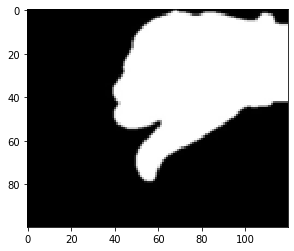

In [16]:
# cat = cv2.imread('gest1_998')
# plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))
import cv2
image = cv2.imread('thumbsdown44.jpg')
image = imresize(image,[100, 120])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [17]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = imresize(gray_image,[100, 120])

gray_image = gray_image.reshape(1, 100, 120, 1)
gray_image.shape

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


(1, 100, 120, 1)

In [302]:
model.save("trained_number_gesture.h5")

In [56]:
from keras.models import load_model
model = load_model("hand_gesture_recog_model.h5")
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 118, 32)       320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 98, 118, 32)       128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 59, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 59, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 57, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 47, 57, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 28, 64)       

In [62]:
pred_idx = np.argmax(model.predict_on_batch(gray_image), axis=1)


In [63]:
pred_idx

array([3])